In [ ]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.9 MB/s eta 0:00:00


In [ ]:
#Pemuatan data dan impor pustaka
from google.colab import files
uploaded = files.upload()

Saving Classification - Instagram Fake Users.ipynb to Classification - Instagram Fake Users (1).ipynb
Saving user_fake_authentic_2class.csv to user_fake_authentic_2class (1).csv
Saving user_fake_authentic_4class.csv to user_fake_authentic_4class (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
file_path = 'user_fake_authentic_2class.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat!")
except FileNotFoundError:
    print("File tidak ditemukan. Pastikan nama file sudah benar.")
    exit()


Dataset berhasil dimuat!



 Analisis Pola Penggunaan Hashtag 


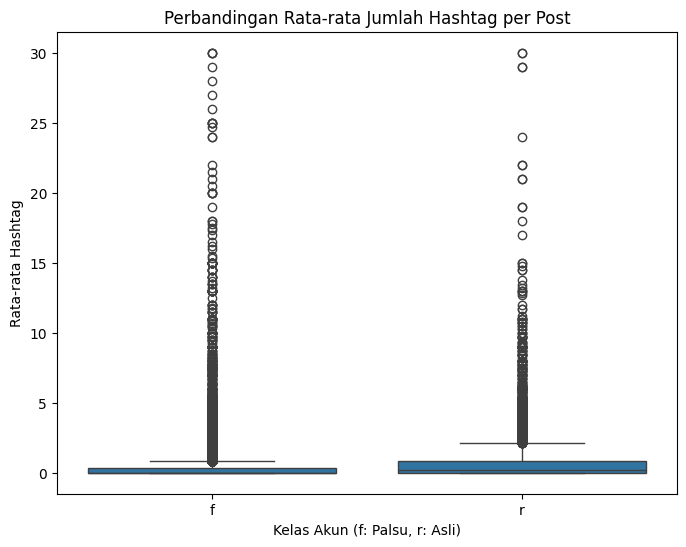

In [ ]:
# Analisis pada fitur (Hashtag & Interval Posting)
print("\n Analisis Pola Penggunaan Hashtag ")
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='hc', data=df)
plt.title('Perbandingan Rata-rata Jumlah Hashtag per Post')
plt.xlabel('Kelas Akun (f: Palsu, r: Asli)')
plt.ylabel('Rata-rata Hashtag')
plt.show()


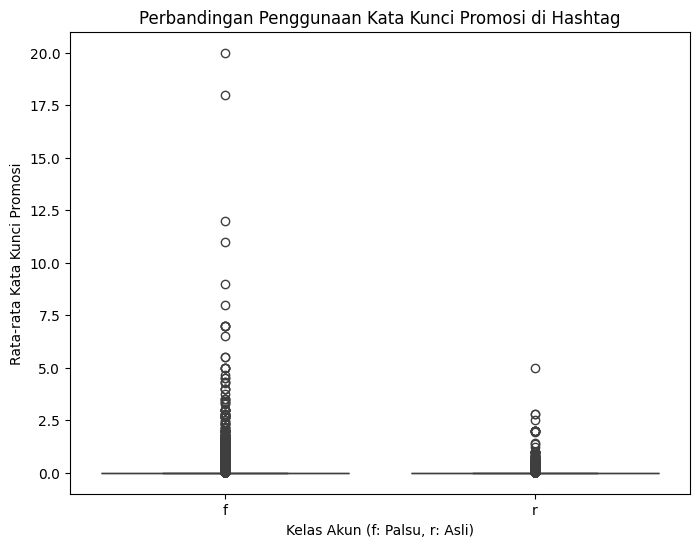

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='pr', data=df)
plt.title('Perbandingan Penggunaan Kata Kunci Promosi di Hashtag')
plt.xlabel('Kelas Akun (f: Palsu, r: Asli)')
plt.ylabel('Rata-rata Kata Kunci Promosi')
plt.show()



 Analisis Waktu Posting 


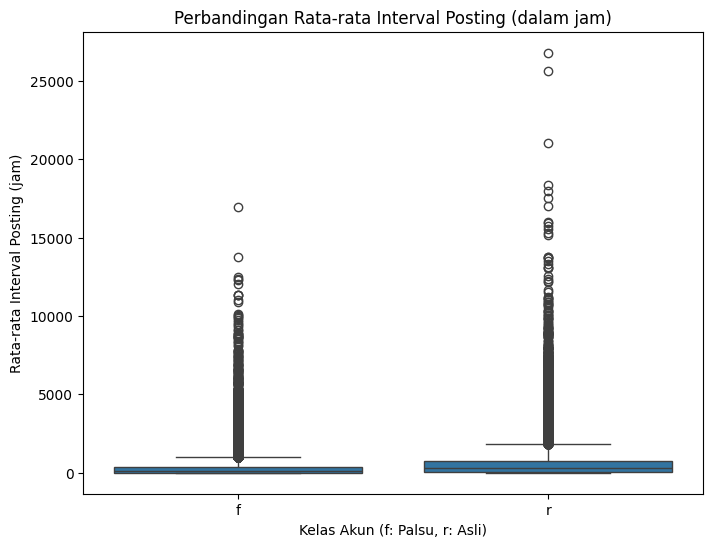

In [ ]:
print("\n Analisis Waktu Posting ")
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='pi', data=df)
plt.title('Perbandingan Rata-rata Interval Posting (dalam jam)')
plt.xlabel('Kelas Akun (f: Palsu, r: Asli)')
plt.ylabel('Rata-rata Interval Posting (jam)')
plt.show()

In [ ]:
print("\n Pra-pemrosesan Data Numerik dan Pemodelan ")
try:
    le = LabelEncoder()
    df['target_encoded'] = le.fit_transform(df['class'])
    kolom_target = 'class'
except KeyError:
    kolom_target = 'cl'
    le = LabelEncoder()
    df['target_encoded'] = le.fit_transform(df[kolom_target])



 Pra-pemrosesan Data Numerik dan Pemodelan 


In [ ]:
X = df.drop(columns=[kolom_target, 'target_encoded'], errors='ignore')
y = df['target_encoded']

In [ ]:
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

In [ ]:
data_cleaned = pd.concat([X, y], axis=1).dropna()
X_cleaned = data_cleaned.drop('target_encoded', axis=1)
y_cleaned = data_cleaned['target_encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)


In [ ]:
print("\n Memulai Pemodelan ")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


--- Memulai Pemodelan ---


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print(f"\n Kinerja Model ")
print(f"Akurasi: {accuracy_score(y_test, y_pred):.2f}")
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))



 Kinerja Model 
Akurasi: 0.90

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      6611
           1       0.85      0.96      0.90      6455

    accuracy                           0.90     13066
   macro avg       0.90      0.90      0.89     13066
weighted avg       0.90      0.90      0.89     13066



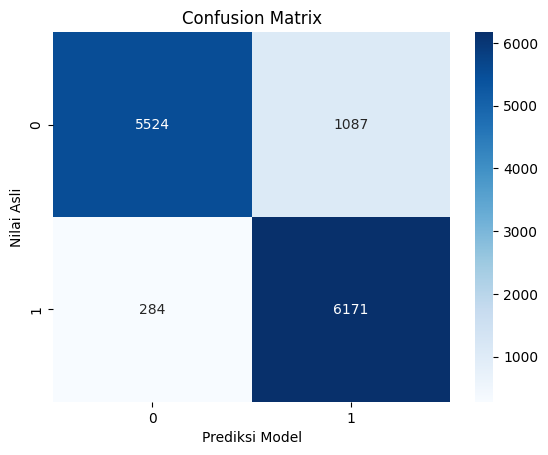

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi Model')
plt.ylabel('Nilai Asli')
plt.show()


In [ ]:
importances = model.feature_importances_
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

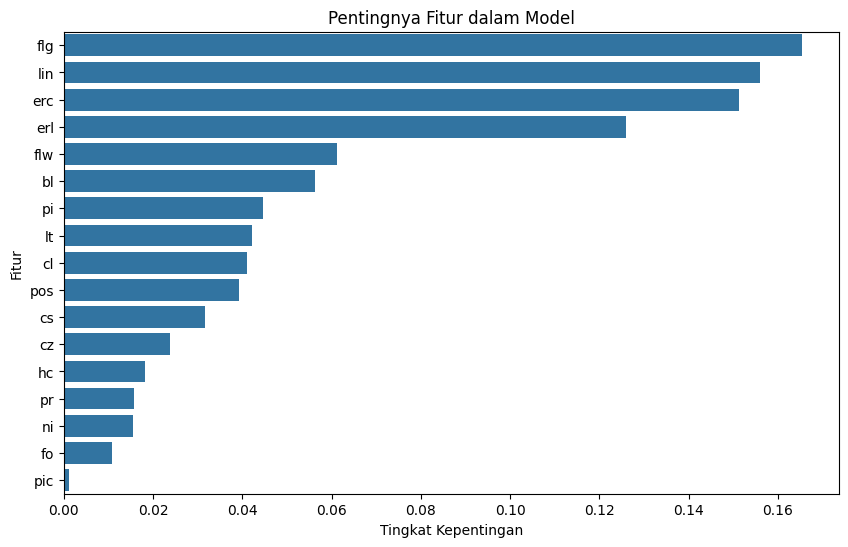

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=forest_importances.values, y=forest_importances.index)
plt.title('Pentingnya Fitur dalam Model')
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Fitur')
plt.show()


In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20]
}


In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20], 'n_estimators': [50, 100]})

In [ ]:
print(f"\nParameter terbaik: {grid_search.best_params_}")
print(f"Skor terbaik: {grid_search.best_score_:.2f}")


Parameter terbaik: {'max_depth': 20, 'n_estimators': 100}
Skor terbaik: 0.90


# Capstone Project: Analisis Deteksi Akun Instagram Palsu dan Asli

## Tujuan
Membangun model machine learning untuk mengklasifikasikan akun Instagram apakah **asli (real)** atau **palsu (fake)**
berdasarkan fitur seperti jumlah hashtag, penggunaan kata promosi, dan interval waktu posting.

## Dataset
- File: `user_fake_authentic_2class.csv`
- Label:
  - `f` = akun palsu
  - `r` = akun asli